In [21]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = [1, -2]
mean2 = [1, 3]
r = 0.7
D = 2.0
V = [[D, D * r], [D * r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок МО и ковариационной матрицы
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T])
VV = np.array([[np.dot(a[0], a[0]) / (2*N), np.dot(a[0], a[1]) / (2*N)],
                [np.dot(a[1], a[0]) / (2*N), np.dot(a[1], a[1]) / (2*N)]])

Py1, Py2 = 0.5, 0.5
L1, L2 = 1, 1

np.random.seed(42)

predict = []

for x in x_train:
    g1 = np.log(L1 * Py1) - 0.5 * mm1 @ np.linalg.inv(VV) @ mm1 + x @ np.linalg.inv(VV) @ mm1 
    g2 = np.log(L2 * Py2) - 0.5 * mm2 @ np.linalg.inv(VV) @ mm2 + x @ np.linalg.inv(VV) @ mm2
    
    predict.append(np.argmax([g1, g2]) * 2 - 1)

predict = np.array(predict)

Q = np.sum(predict != y_train)

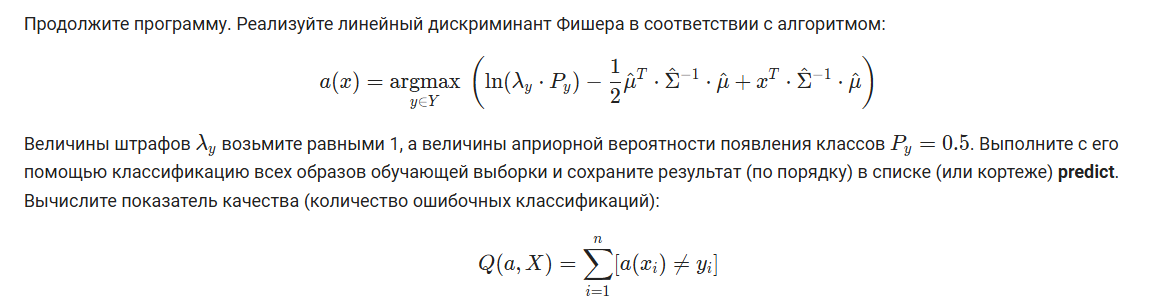